# Import the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Import and Explore the data

In [2]:
# Load the Excel file
data = pd.read_excel('IRIS FLOWER.xlsx')

In [3]:
print(data.head())  # View the first few rows of the dataset

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
print(data.describe())  # Summary statistics

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [5]:
print(data.shape)

(150, 5)


In [6]:
print(data.info())# Check data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [7]:
print(data.isnull().sum())  # Check for missing values in each column

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [8]:
print(data['species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


# Exploratory Data Analysis(EDA)

<Figure size 1200x800 with 0 Axes>

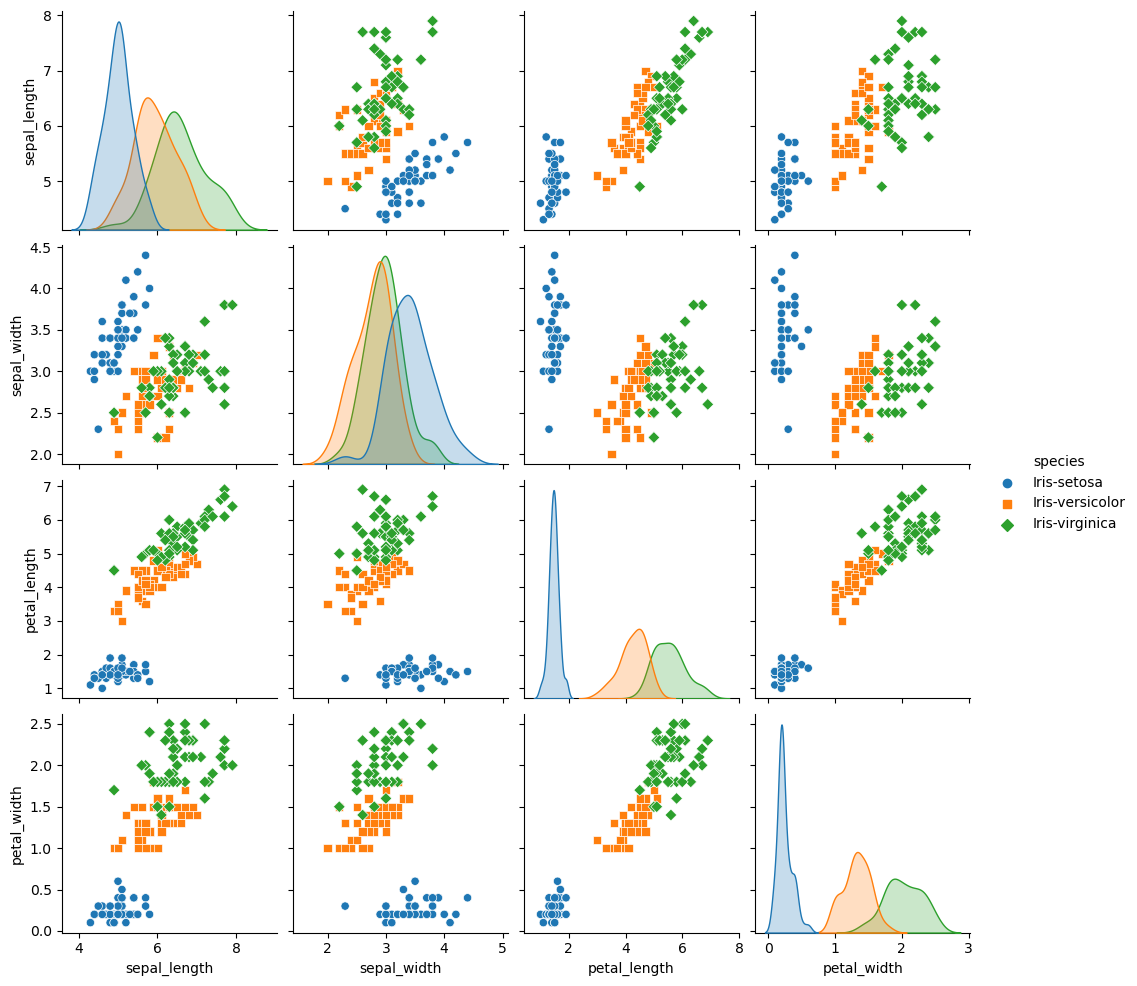

In [9]:
# Pair plot for relationships between features
plt.figure(figsize=(12, 8))
sns.pairplot(data, hue='species', markers=["o", "s", "D"])
plt.show()


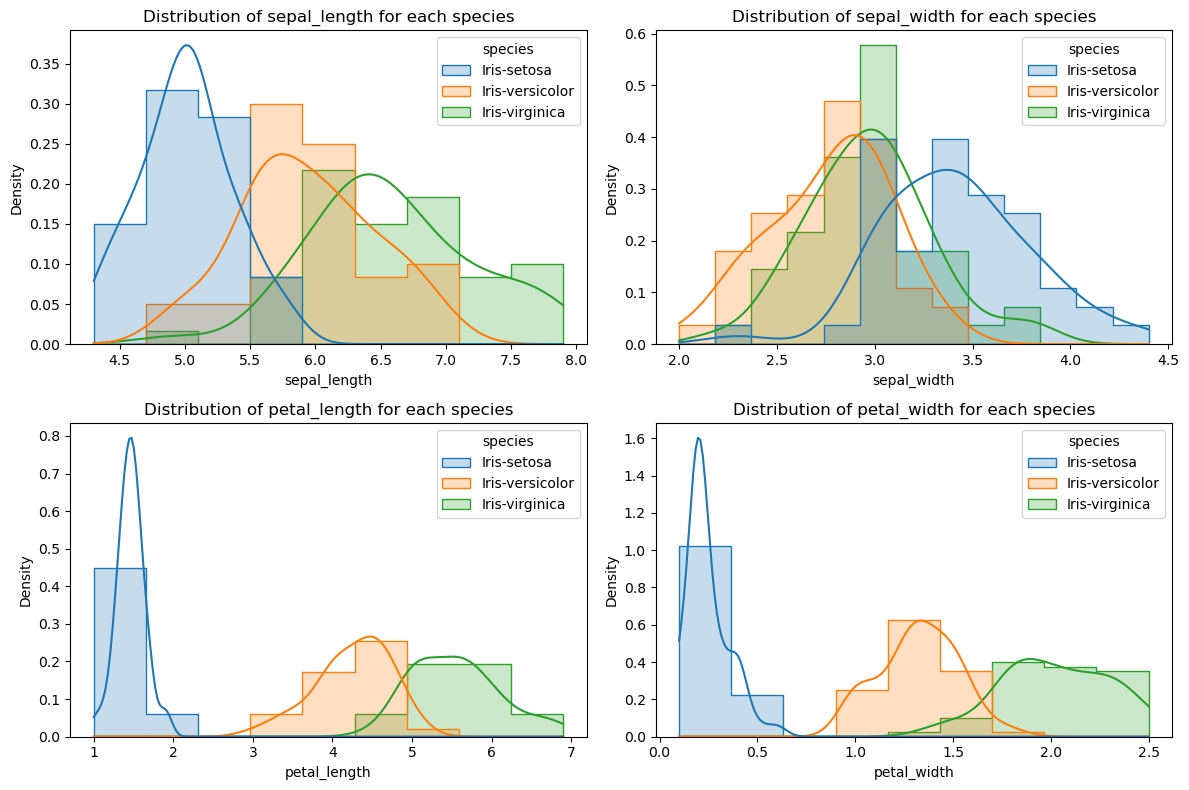

In [10]:
# Visualize distribution of features for each species
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(column_names[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=data, x=feature, hue='species', kde=True, element="step", stat="density")
    plt.title(f'Distribution of {feature} for each species')
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11244\3728000592.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


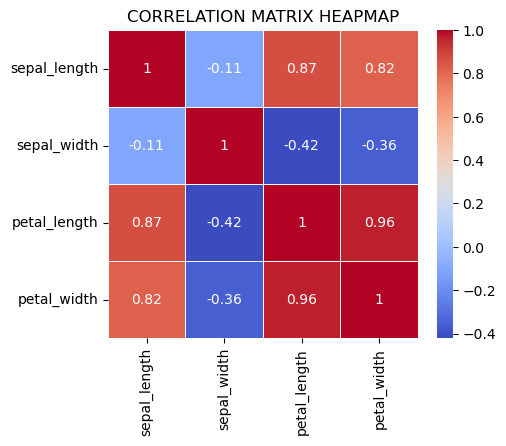

In [11]:
# Correlation matrix heatmap
plt.figure(figsize=(5, 4))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('CORRELATION MATRIX HEAPMAP')
plt.show()

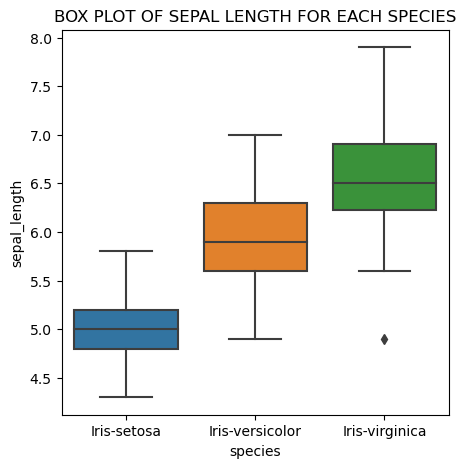

In [12]:
# Box plot to visualize feature distributions
plt.figure(figsize=(5, 5))
sns.boxplot(x='species', y='sepal_length', data=data)
plt.title('BOX PLOT OF SEPAL LENGTH FOR EACH SPECIES')
plt.show()


# Hypothesis Test Analysis

In [13]:
# Create a contingency table
contingency_table = pd.crosstab(data['species'], data['sepal_width'])


In [14]:
# Print the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
sepal_width      2.0  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.0  ...  3.4  \
species                                                            ...        
Iris-setosa        0    0    1    0    0    0    0    0    1    6  ...    9   
Iris-versicolor    1    2    3    3    4    3    5    6    7    8  ...    1   
Iris-virginica     0    1    0    0    4    2    4    8    2   12  ...    2   

sepal_width      3.5  3.6  3.7  3.8  3.9  4.0  4.1  4.2  4.4  
species                                                       
Iris-setosa        6    2    3    4    2    1    1    1    1  
Iris-versicolor    0    0    0    0    0    0    0    0    0  
Iris-virginica     0    1    0    2    0    0    0    0    0  

[3 rows x 23 columns]


In [15]:
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistic and p-value
print("\nChi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, columns=contingency_table.columns, index=contingency_table.index))



Chi-square Statistic: 88.36446886446886
P-value: 8.303947787862062e-05
Degrees of Freedom: 44

Expected Frequencies:
sepal_width           2.0  2.2       2.3  2.4       2.5       2.6  2.7  \
species                                                                  
Iris-setosa      0.333333  1.0  1.333333  1.0  2.666667  1.666667  3.0   
Iris-versicolor  0.333333  1.0  1.333333  1.0  2.666667  1.666667  3.0   
Iris-virginica   0.333333  1.0  1.333333  1.0  2.666667  1.666667  3.0   

sepal_width           2.8       2.9       3.0  ...  3.4  3.5  3.6  3.7  3.8  \
species                                        ...                            
Iris-setosa      4.666667  3.333333  8.666667  ...  4.0  2.0  1.0  1.0  2.0   
Iris-versicolor  4.666667  3.333333  8.666667  ...  4.0  2.0  1.0  1.0  2.0   
Iris-virginica   4.666667  3.333333  8.666667  ...  4.0  2.0  1.0  1.0  2.0   

sepal_width           3.9       4.0       4.1       4.2       4.4  
species                                        

In [16]:
# Check if the result is statistically significant
alpha = 0.05
print("\nResult:")
if p < alpha:
    print("Reject the null hypothesis. There is a significant association between 'species' and 'sepal_width'.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between 'species' and 'sepal_width'.")


Result:
Reject the null hypothesis. There is a significant association between 'species' and 'sepal_width'.


In [17]:
# Extract the sepal length for each species
setosa_sepal_length = data[data['species'] == 'Iris-setosa']['sepal_length']
versicolor_sepal_length = data[data['species'] == 'Iris-versicolor']['sepal_length']
virginica_sepal_length = data[data['species'] == 'Iris-virginica']['sepal_length']

# Perform ANOVA test
f_statistic, p_value = f_oneway(setosa_sepal_length, versicolor_sepal_length, virginica_sepal_length)

# Print the result
print("ANOVA Test Result:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

ANOVA Test Result:
F-statistic: 119.26450218450468
P-value: 1.6696691907693826e-31


In [18]:
# Check if the result is statistically significant
alpha = 0.05
print("\nResult:")
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between the means.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences between the means.")


Result:
Reject the null hypothesis. There are significant differences between the means.


# Linear regression model

In [19]:
# Separate features (X) and target variable (y)
X = data[['sepal_width', 'petal_length', 'petal_width']]
y = data['sepal_length']

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [23]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.10222382910995506
R-squared: 0.8519067571325744


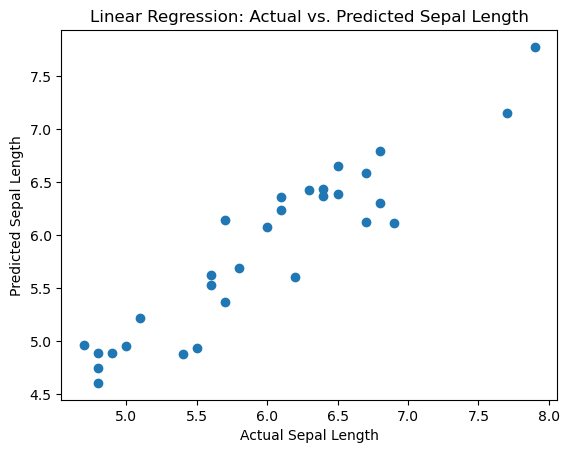

In [24]:
# Plot the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sepal Length")
plt.ylabel("Predicted Sepal Length")
plt.title("Linear Regression: Actual vs. Predicted Sepal Length")
plt.show()

In [25]:
# Separate features (X) and target variable (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = svm_classifier.predict(X_test_scaled)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [27]:
# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


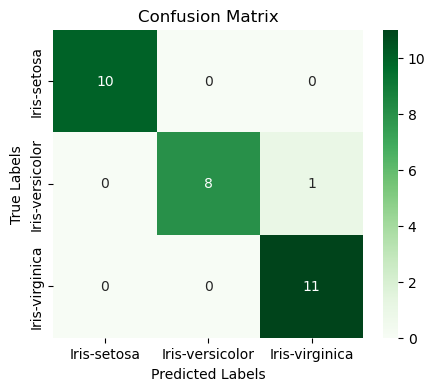

In [29]:
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=data['species'].unique(), yticklabels=data['species'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Support Vector Machine (SVM) Classifier

In [30]:
# Standardize the features by scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [32]:
# Make predictions on the scaled test set
y_pred = svm_classifier.predict(X_test_scaled)

In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [34]:
print("Support Vector Machine (SVM) Classifier:")
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

Support Vector Machine (SVM) Classifier:
Accuracy: 0.97

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

